In [1]:
# Регрессия для признака CC50 
# с использованием различных моделей машинного обучения
# Загрузка биьлиотек

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, recall_score, roc_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from umap.umap_ import UMAP
from sklearn.metrics import roc_curve, auc




C:\Users\Eve\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загрузка датасета
df = pd.read_csv('F:\\MIFI-github\\MIFI_course_work_CML\\Data\\dataset_for_CC50_950.csv')



C:\Users\Eve\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Eve\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eve\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Без снижения размерности ===
LinearRegression:
  Лучшие параметры: default
  Accuracy: 0.689, Recall: 0.850, ROC_AUC: 0.780, R2: 0.286
DecisionTree:
  Лучшие параметры: {'max_depth': 3}
  Accuracy: 0.695, Recall: 0.920, ROC_AUC: 0.740, R2: 0.289
RandomForest:
  Лучшие параметры: {'max_depth': 10, 'n_estimators': 100}
  Accuracy: 0.753, Recall: 0.930, ROC_AUC: 0.831, R2: 0.389
CatBoost:
  Лучшие параметры: {'depth': 8, 'learning_rate': 0.01}
  Accuracy: 0.774, Recall: 0.910, ROC_AUC: 0.854, R2: 0.430
MLPRegressor:
  Лучшие параметры: {'hidden_layer_sizes': (100,), 'max_iter': 500}
  Accuracy: 0.753, Recall: 0.860, ROC_AUC: 0.838, R2: 0.432
SVR:
  Лучшие параметры: {'C': 10, 'kernel': 'linear'}
  Accuracy: 0.689, Recall: 0.820, ROC_AUC: 0.782, R2: 0.217

=== PCA ===
LinearRegression:
  Лучшие параметры: default
  Accuracy: 0.668, Recall: 0.920, ROC_AUC: 0.789, R2: 0.285
DecisionTree:
  Лучшие параметры: {'max_depth': 3}
  Accuracy: 0.663, Recall: 0.890, ROC_AUC: 0.718, R2: 0.209
Ran

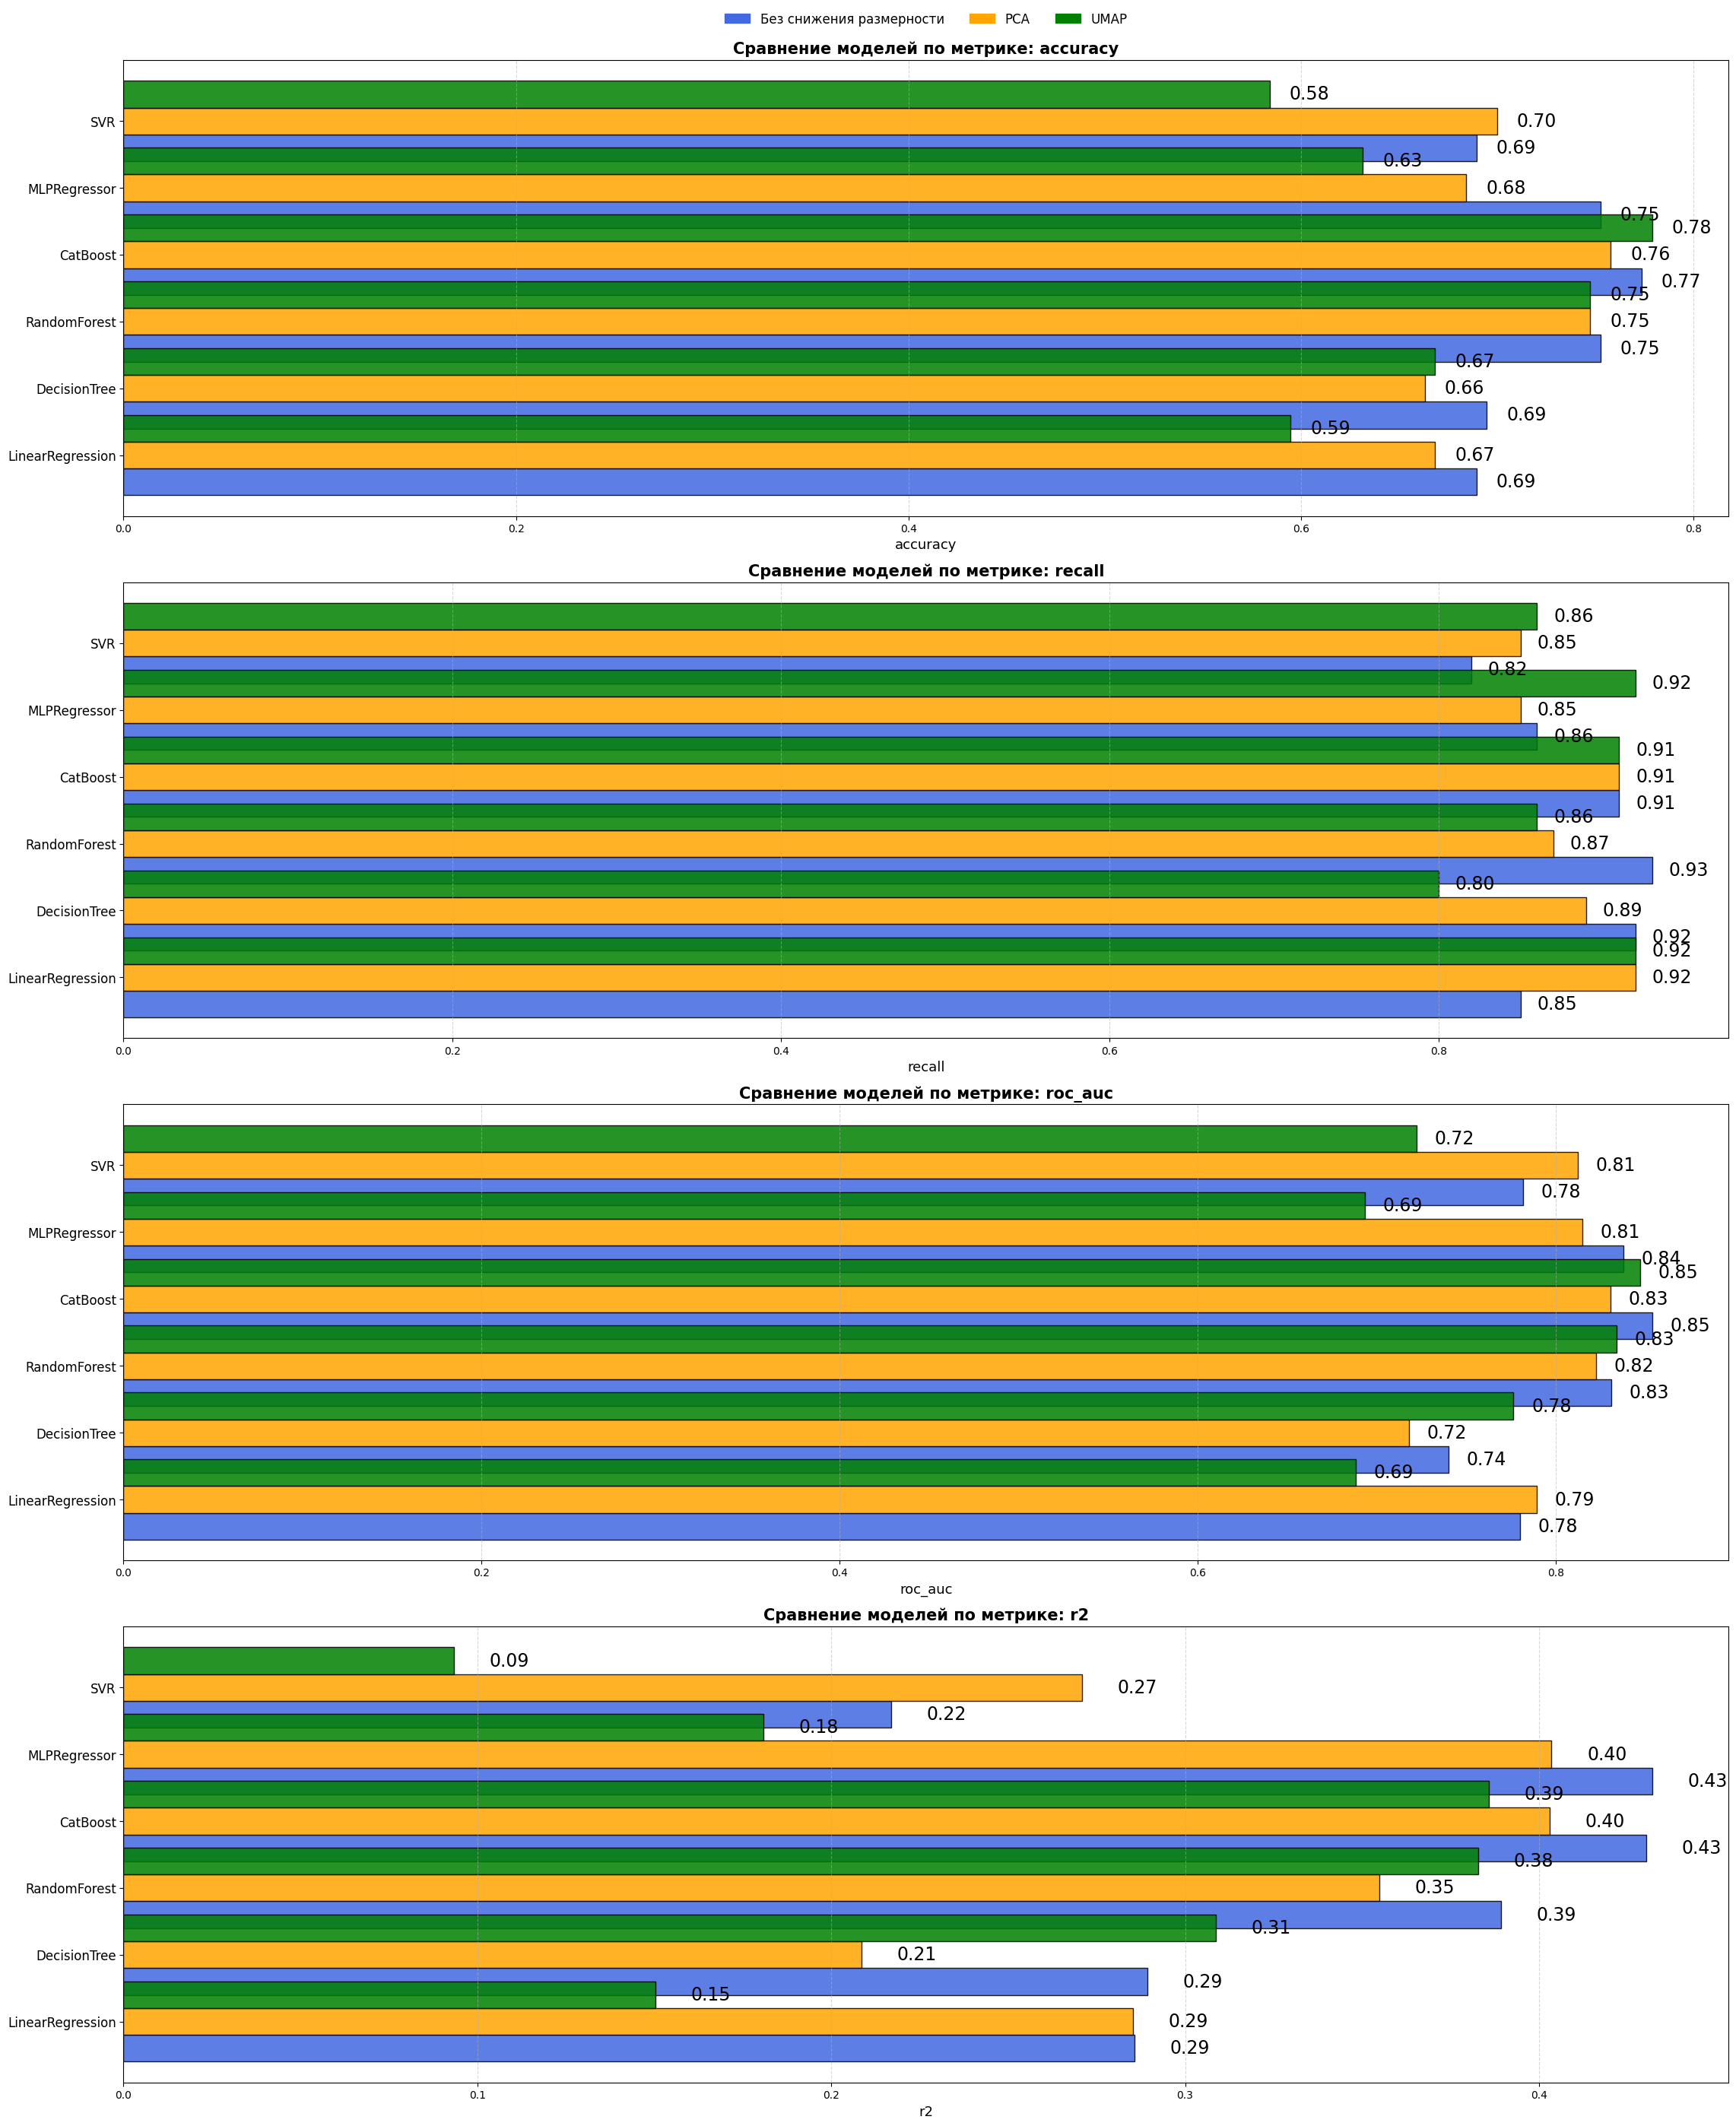

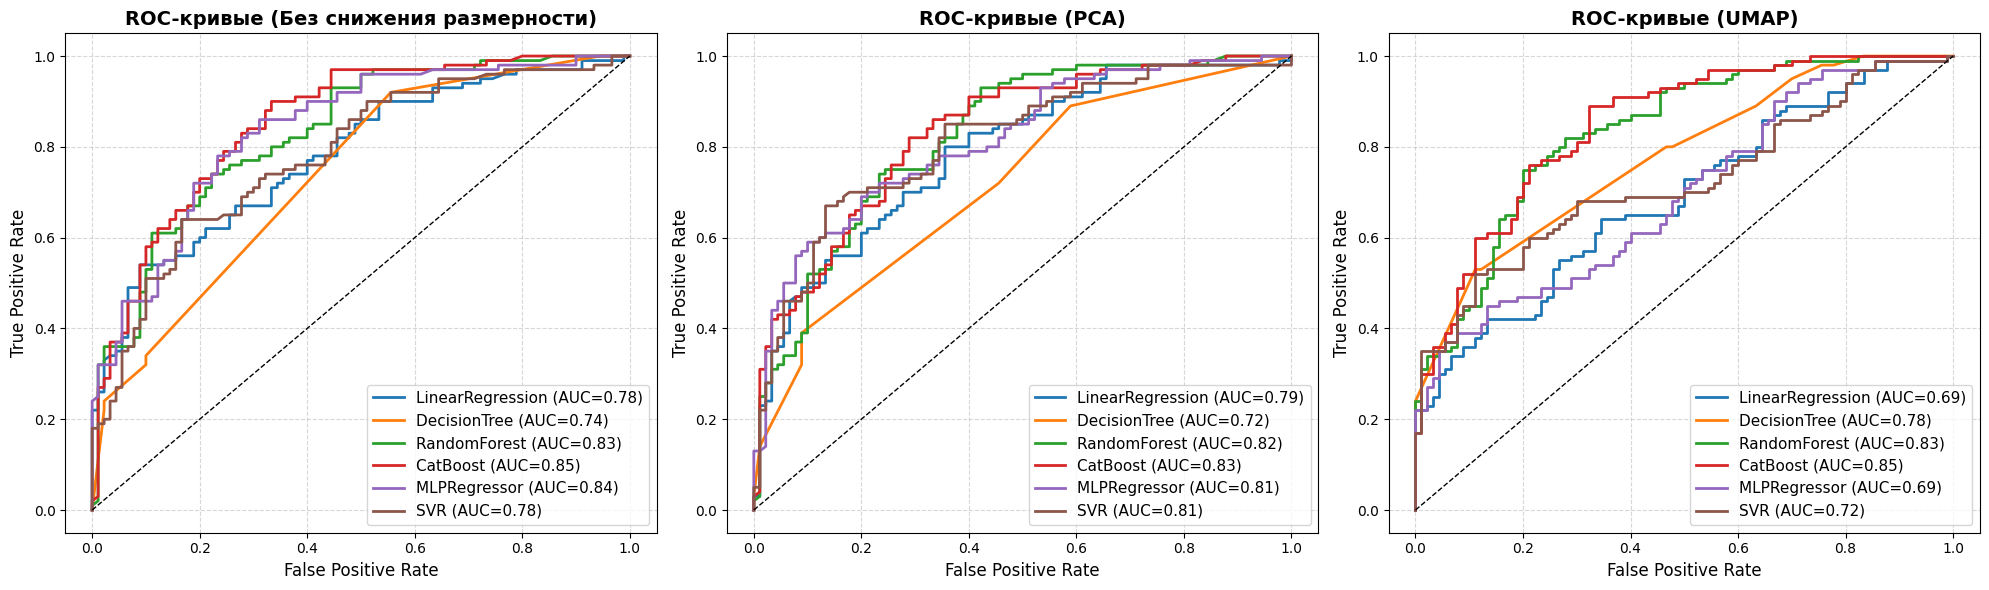

In [4]:
import sys
sys.path.append('F:\\MIFI-github\\MIFI_course_work_CML')
from modules.add_linar_regres_function import compare_models_linar_regression

def compare_models_linear_regression(
    df, 
    target_col='CC50, mM', 
    test_size=0.2, 
    random_state=42, 
    n_components=15,
    **kwargs
):
    # Разделение данных
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None  # Можно добавить, но для регрессии обычно не используется
    )
    
    # Масштабирование и PCA
    scaler = StandardScaler()
    pca = PCA(n_components=n_components)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Модели
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state),
        'SVR': SVR()
    }
    
    # Обучение и оценка
    results = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)
        
        results[name] = {
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred)
        }
    
    return pd.DataFrame(results).T